<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S06_Descriptive_Analytics/S6_AfterClass_Exercises_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S6 - AfterClass Exercise: Descriptive Analytics and  Visualization 
---
## Instructions:
Most of the exercises presented here allows you to practice basic Python programming for some applications in Operations Management and Logistics.

For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.

NOTE: Please pay attention to the variable name of the output you would need to provide under each question. You must use the same variable name for the output so that the result can be printed out correctly.

# Analyzing and Visualizing Crops Statistics in the Americas
In this notebook, you will implement some visualization of the data about crop statistics in the Americas. This data is available at the file `Production_Crops_E_Americas.csv`, adapted from data provided by the Food and Agriculture Organization of the United Nations (FAO). The original files can be found at [this page](https://data.world/agriculture/crop-production).

This is a description of the columns of our adapted data:

| VARIABLE NAME | DESCRIPTION | 
|:----|:----|
|area_code| numeric value representing the area|
|area| name of the area (e.g., Argentina, Canada, Chile, Colombia)|
|item_code| numeric value representing the item |
|item| name of the product (e.g, Bananas, Beans, Cassava)|
|element_code|numeric value representing the element|
|element|specification of the data (e.g., Area Harvested, Yield, Production)|
|unit| measure unit (e.g., ha - *hectare* -, hg/ha - *hectogram per hectare* -,and tonnes |
|Y2000| crop of the year 2000|
|...|...|
|Y2014| crop of the year 2014|

## Data preparation:  Importing libraries and Data Set

In the code cell below, import the `pandas` library under the alias `pd`; the library `seaborn` under the alias `sns`; and the `matplotlib.pyplot` library under the alias `plt`. 

Note that we will be using the `% matplotlib inline` magic command to make sure our graphics are displayed in our Jupyter Notebook. 

**IMPORTANT:** You simply need to execute the codes below to preprocess data until the DataFrame `df_transformed` is generated (prior to Exercise 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import the data file `'Production_Crops_E_Americas.csv'` into a `DataFrame` named `df_crops`. 

**Note:** you can use the `pandas.read_csv()` function and parameter `encoding` set as `'latin-1'` to avoid errors due to special characters in the data file.

In [ ]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/EN/S06_Descriptive_Analytics/Production_Crops_E_Americas.csv'
df_crops = pd.read_csv(url, encoding='latin-1')  # reading data file into a DataFrame
df_crops.head()
    
# replacing missing values with 0
df_crops.fillna(0, inplace=True)  

Since the data is in a pivot structure, we transform it using the function `pd.melt(...)` to unpivot it and rearrange the years into one column. See [link](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).

In [ ]:
df_unpivot = pd.melt(df_crops, id_vars=['item', 'area', 'element'], value_vars=['Y20%02d'%(i) for i in range(15)], 
        var_name='year', value_name='value') 
df_unpivot

,item,area,element,year,value
0,Barley,Argentina,Area harvested,Y2000,247830.0
1,Barley,Argentina,Yield,Y2000,29153.0
2,Barley,Argentina,Production,Y2000,722490.0
3,Barley,Argentina,Seed,Y2000,30800.0
4,Barley,Bolivia (Plurinational State of),Area harvested,Y2000,88569.0
...,...,...,...,...,...
89290,Yams,Trinidad and Tobago,Production,Y2014,103.0
89291,Yams,Venezuela (Bolivarian Republic of),Area harvested,Y2014,5497.0
89292,Yams,Venezuela (Bolivarian Republic of),Yield,Y2014,92081.0
89293,Yams,Venezuela (Bolivarian Republic of),Production,Y2014,50617.0


We then transform the data and put the values in separate columns for variables. 

In [ ]:
df_transformed = df_unpivot.pivot(index=["item", "area", "year"], columns='element', values='value').reset_index()
df_transformed

element,item,area,year,Area harvested,Production,Seed,Yield
0,Barley,Argentina,Y2000,247830.0,722490.0,30800.0,29153.0
1,Barley,Argentina,Y2001,246490.0,530045.0,31700.0,21504.0
2,Barley,Argentina,Y2002,250760.0,549830.0,40500.0,21927.0
3,Barley,Argentina,Y2003,334348.0,1005460.0,33000.0,30072.0
4,Barley,Argentina,Y2004,275307.0,894610.0,32500.0,32495.0
...,...,...,...,...,...,...,...
28240,Yams,Venezuela (Bolivarian Republic of),Y2010,9814.0,93979.0,5157.0,95760.0
28241,Yams,Venezuela (Bolivarian Republic of),Y2011,10314.0,104295.0,5446.0,101120.0
28242,Yams,Venezuela (Bolivarian Republic of),Y2012,7799.0,70501.0,7406.0,90397.0
28243,Yams,Venezuela (Bolivarian Republic of),Y2013,5264.0,50487.0,7406.0,95910.0


## Exercise 1:  Visualizations
Let's explore the production of some products in Canada from 2000 to 2014. For that, we first separate the data of interest. More specifically, we are intested only the data from `df_transformed` based on the following conditions 

*   `area = 'Canada'` 
*   list of items (products) to analyze: `'Blueberries'`, `'Raspberries'`, and `'Strawberries'`

Please put the resulting DataFrame into a new DataFrame object `df_canada`

In [ ]:
### start your code here ###

df_canada = df_transformed[(df_transformed.area == 'Canada') & ((df_transformed.item == 'Blueberries') |\
                           (df_transformed.item == 'Raspberries')| (df_transformed.item ==  'Strawberries'))]
df_canada.head()
### end your code here ###

element,item,area,year,Area harvested,Production,Seed,Yield
1035,Blueberries,Canada,Y2000,23921.0,59035.0,NaN,24679.0
1036,Blueberries,Canada,Y2001,25000.0,67708.0,NaN,27083.0
1037,Blueberries,Canada,Y2002,25817.0,64861.0,NaN,25123.0
1038,Blueberries,Canada,Y2003,27142.0,78608.0,NaN,28962.0
1039,Blueberries,Canada,Y2004,28162.0,82310.0,NaN,29227.0
1040,Blueberries,Canada,Y2005,29704.0,69410.0,NaN,23367.0
1041,Blueberries,Canada,Y2006,31485.0,82530.0,NaN,26212.0
1042,Blueberries,Canada,Y2007,30274.0,77400.0,NaN,25566.0
1043,Blueberries,Canada,Y2008,34109.0,95516.0,NaN,28003.0
1044,Blueberries,Canada,Y2009,34848.0,102750.0,NaN,29485.0


**b)** Create a line graph from the DataFrame `df_canada` to show the  production of `'Blueberries'`, `'Raspberries'` and `'Strawberries'` in Canada. Configure the aesthetics of your graph as follows.

* Set the size of the figure to `12, 6`
* Give the title `Annual Production in Canada` to the graph
* Set the labels of the `x`-axis and `y`-axis as `Years` and  `Tonnes`, respectively
* Each item should appear as a separate line in the graph using arguments `hue = "item"`,  `style = "item"` and `markers = True`
    
**Hint**:  

*   Use the function `seaborn.lineplot()` to draw a line plot with several semantic groupings (e.g., to differentiate items). Check [this page](https://seaborn.pydata.org/generated/seaborn.lineplot.html) for more information abut this function. 
*   Use functions `plt.title()` and `plt.figure()` to set the title and size of the graph, respectively. 
 


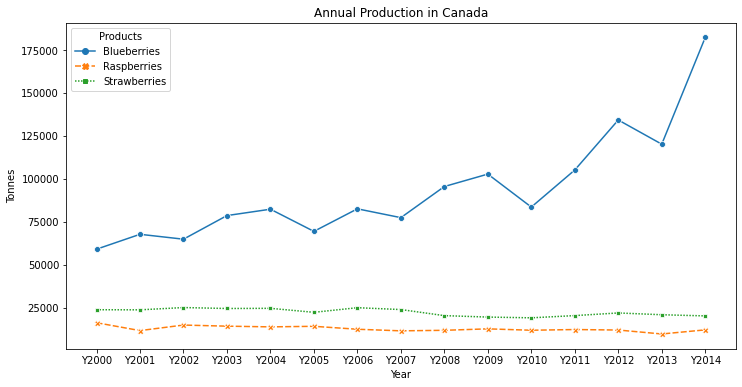

In [ ]:
### start your code here ###
# sns.set_style('dark')
plt.figure(figsize=(12, 6))             # setting the size of the graph
plt.title('Annual Production in Canada')  # Giving a title to the graph
g = sns.lineplot(data=df_canada, x='year', y='Production',
             hue="item", markers = True,  # activating markes and differentiation by item
             style='item')
g.set(ylabel = 'Tonnes', xlabel = 'Year')    # setting the label name for each axis
plt.legend(title='Products')                # modifying the default title of the legend
### end your code here ###

**c.)** Create a scatter plot from the DataFrame `df_canada` to show the relations between the harvested area and the production of the selected products in Canada. Configure the aesthetics of your graph as follow.

* Set the size of the figure to `12, 6`
* Give a meaningful title to the graph
* Use the style `'white'`
* Set the labels of the `x`-axis and `y`-axis as `Tonnes` and  `Hectares`, respectively
* Each product should be differentiated using the argument `hue='item'`
    
**Hint:** 
* Use the function `seaborn.scatterplot()` to draw a line plot with several semantic groupings (e.g., to differentiate items). Check [this page](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for more information abut this function.  

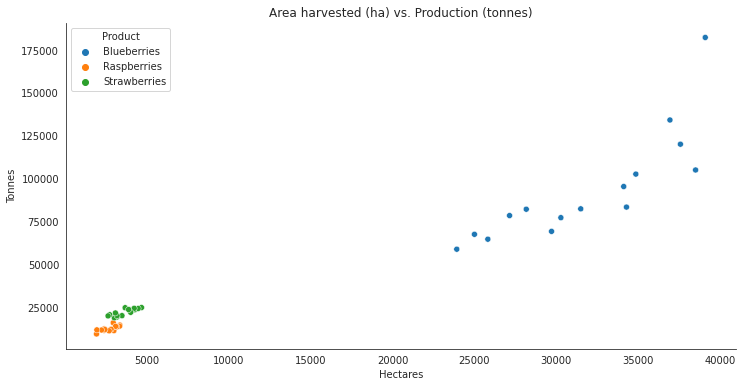

In [ ]:
### start your code here ### 
sns.set_style('white')       # setting up the style of the plot
plt.figure(figsize=(12,6))   # set size 
g = sns.scatterplot(data=df_canada, x='Area harvested', y='Production', hue='item')  # creating the plot
g.set(xlabel='Hectares', ylabel='Tonnes', title='Area harvested (ha) vs. Production (tonnes)') # setting names to the axes labels and title
plt.legend(title='Product')  # modifying the default name of the legend
sns.despine()                # eliminating borders
### end your code here ####

## Exercise 2: Clustering algorithms

**a)** Please filter and transform the data from the transformed DataFrame `df_transformed` (which contains the data of all the countries) using the following steps

* Step 1: Filter only the item: `'Grapes'`
* Step 2: Use the function `groupby` to summarize the statistics by country (`area`) for the following variables:
  *   Average 'Production' per year
  *   Average 'Yield' per year
* Step 3: Remove rows with `NaN` (Hint: you can use `df = df.dropna(axis='rows')`. See [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).
* Step 4: Normalize the two columns above using z-score transformation and put them in the new columns with prefix `z_`





In [ ]:
### start your code here ### 
df_summary = df_transformed[(df_transformed.item == 'Grapes')].groupby(['area']).mean()
df_summary = df_summary[['Production', 'Yield']]
df_summary = df_summary.dropna(axis='rows')

for col in ['Production', 'Yield']:
  df_summary["z_"+col]  = (df_summary[col] - df_summary[col].mean())/df_summary[col].std() 

df_summary
### end your code here ####

element,Production,Yield,z_Production,z_Yield
area,,,,
Argentina,2.618697e+06,122241.000000,1.011876,0.208568
Bolivia (Plurinational State of),2.969147e+04,64885.200000,-0.471604,-1.121191
Brazil,1.299854e+06,173568.266667,0.256189,1.398560
Canada,7.672400e+04,77736.933333,-0.444654,-0.823232
Chile,2.239552e+06,120645.533333,0.794629,0.171578
Colombia,2.600747e+04,133462.600000,-0.473715,0.468734
Cuba,2.153333e+04,121126.133333,-0.476278,0.182721
Ecuador,4.482667e+02,59265.000000,-0.488360,-1.251492
Guatemala,1.649587e+04,73078.466667,-0.479165,-0.931235


**Note:** For the following two questions, you can make use of the codes for clustering in the lecture and adapt for this data.

**b)** Apply K-Means method to cluster the countries based on the recenly created DataFrame using the normalized variables ['Production', 'Yield']. Please compare the results based on `K = 2, 3, ..., 9` and recommend the best number of clusters. 

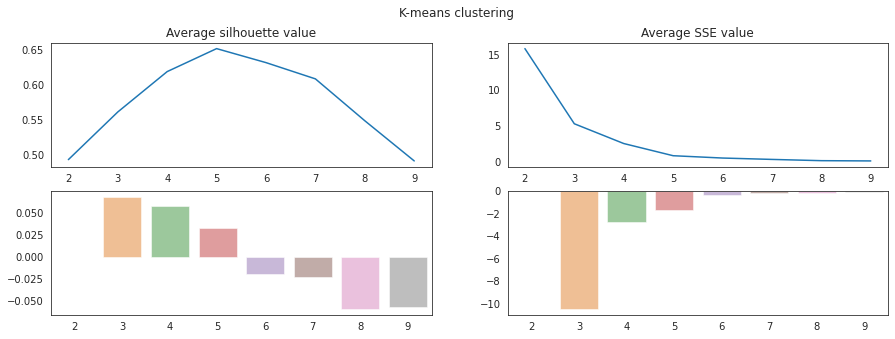

In [ ]:
### start your code here ### 
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering

X = df_summary[["z_Production", "z_Yield"]]

# list the acceptable range of the number of clusters to explore
kmeans_range = list(range(2,10))

# prepare empty lists to store the inertia and silhouette values
inertia_list = []
silhouette_list = []

for k in kmeans_range:
  # fit the clustering algorithm
  kmeans_object = sklearn.cluster.KMeans(n_clusters=k, random_state=0).fit(X)

  # obtain the inertia and add the result to the list
  inertia_list.append(kmeans_object.inertia_)

  # calculate the silhouette score by providing data X and labels, then add the result to the list
  silhouette_val = sklearn.metrics.silhouette_score(X, kmeans_object.labels_)
  silhouette_list.append(silhouette_val)


# calculate the marginal difference of silhouette for each step of k
diff_silhouette = [silhouette_list[i] - silhouette_list[max(0,i-1)] for i in range(len(kmeans_range))]
# calculate the marginal difference of inertia for each step of k
diff_inertia = [inertia_list[i] - inertia_list[max(0,i-1)] for i in range(len(kmeans_range))]

# Plot the results using seaborn using a grid of 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('K-means clustering')

sns.lineplot(ax=axes[0,0], x=kmeans_range, y=silhouette_list).set_title('Average silhouette value')
sns.lineplot(ax=axes[0,1], x=kmeans_range, y=inertia_list).set_title('Average SSE value')
sns.barplot(ax=axes[1,0], x=kmeans_range, y=diff_silhouette, alpha=0.5)
sns.barplot(ax=axes[1,1], x=kmeans_range, y=diff_inertia, alpha=0.5)

### end your code here ####

**c)** Apply (hierarchical) alglomorative clustering method to cluster the countries based on the recenly created DataFrame using the normalized variables `['Production', 'Yield']` using `K = 2, 3, 4`. Please then explain how the resulting hierarchy of the clusters looks like. More specifically, what clusters are aggregated and combined into one cluster starting from `K = 4`?

In [ ]:
### start your code here ### 

# Hierarchical clustering
hcluster2 = sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(X)
df_summary['A2_cluster'] = hcluster2.labels_

# print out the number of countries under each cluster
print(df_summary['A2_cluster'].value_counts())

hcluster3 = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(X)
df_summary['A3_cluster'] = hcluster3.labels_

# print out the number of countries under each cluster
print(df_summary['A3_cluster'].value_counts())

hcluster4 = sklearn.cluster.AgglomerativeClustering(n_clusters=4).fit(X)
df_summary['A4_cluster'] = hcluster4.labels_

# print out the number of countries under each cluster
print(df_summary['A4_cluster'].value_counts())

### end your code here ####

0    10
1     6
Name: A2_cluster, dtype: int64
0    9
1    6
2    1
Name: A3_cluster, dtype: int64
0    7
1    6
3    2
2    1
Name: A4_cluster, dtype: int64


Text(0.5, 1.0, 'A4_cluster')

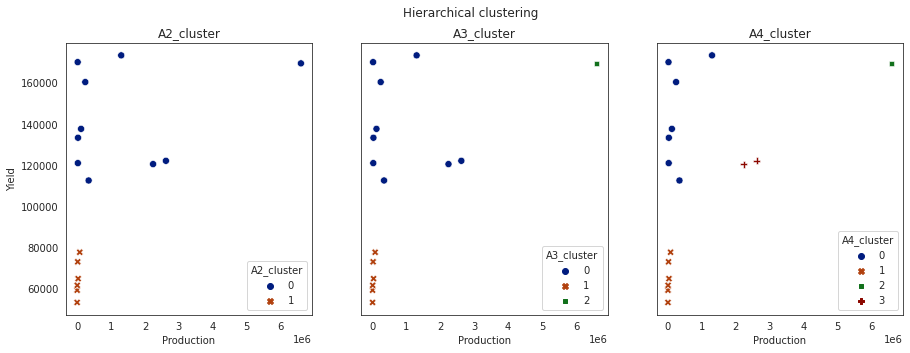

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5),sharey=True)
fig.suptitle('Hierarchical clustering')

# 2 clusters
sns.scatterplot(data = df_summary, ax=axes[0], x='Production', y='Yield', \
                hue='A2_cluster', style='A2_cluster', palette='dark', s=50)
axes[0].set_title('A2_cluster')

# 3 clusters
sns.scatterplot(data = df_summary, ax=axes[1], x='Production', y='Yield', \
                hue='A3_cluster', style='A3_cluster', palette='dark', s=50)
axes[1].set_title('A3_cluster')

# 4 clusters
sns.scatterplot(data = df_summary, ax=axes[2], x='Production', y='Yield', \
                hue='A4_cluster', style='A4_cluster', palette='dark', s=50)
axes[2].set_title('A4_cluster')